# Fashion problem

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The github project is [available here](https://github.com/zalandoresearch/fashion-mnist).

In [1]:
# Data and manipulation

import pandas as pd
import numpy as np
import tensorflow as tf

# Modeling
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold


# Visualizing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import sys
sys.path.append('../')
from utils import plot_2d_embedding

In [3]:
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print(x_train_fashion.shape)
print(y_train_fashion.shape)

(60000, 28, 28)
(60000,)


In [5]:
x_train_fashion[0].shape

(28, 28)

In [6]:
x_train_fashion[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

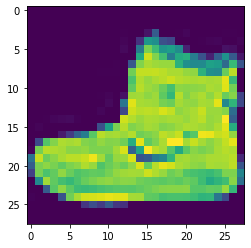

In [7]:
plt.imshow(x_train_fashion[0])

In [8]:
# investigando quantos valores existem em cada classe
pd.DataFrame(y_train_fashion, columns = ['classes']).groupby('classes').size()

classes
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

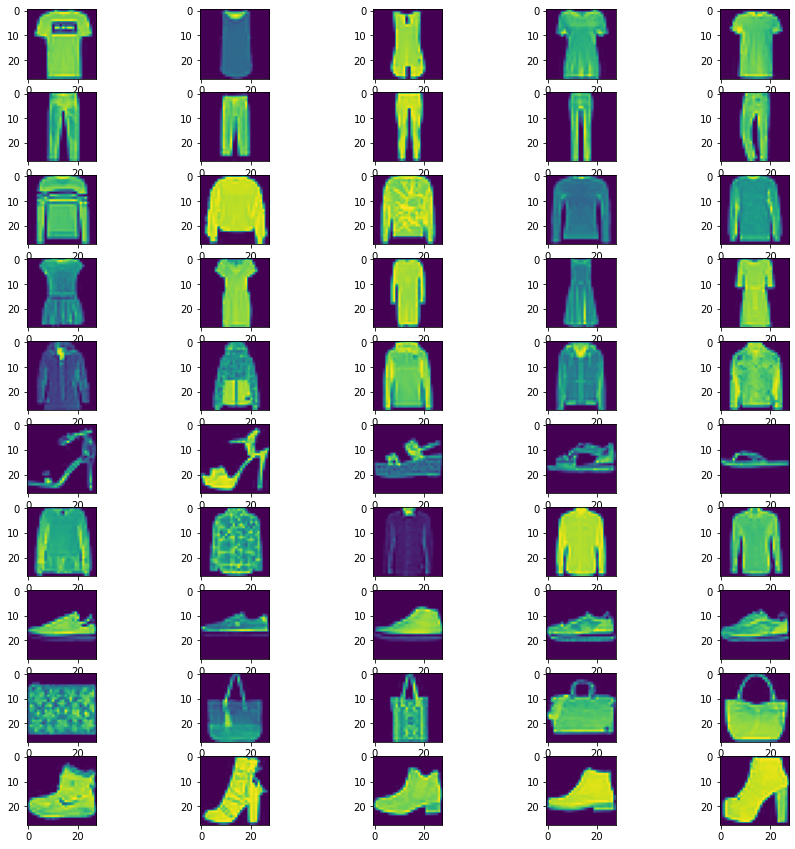

In [9]:
num_labels = 10
num_columns = 5

fig, ax = plt.subplots(num_labels, num_columns, figsize=(15,15))


for label in range(num_labels):
    for i in range(num_columns):
        images = x_train_fashion[y_train_fashion == label][0:num_columns]
        ax[label,i].imshow(images[i])

In [7]:
reshaped_train = x_train_fashion.reshape(60000, 28*28)
reshaped_test = x_test_fashion.reshape(10000, 28*28)

In [8]:
df = pd.DataFrame(reshaped_train)
corr = df.corr()

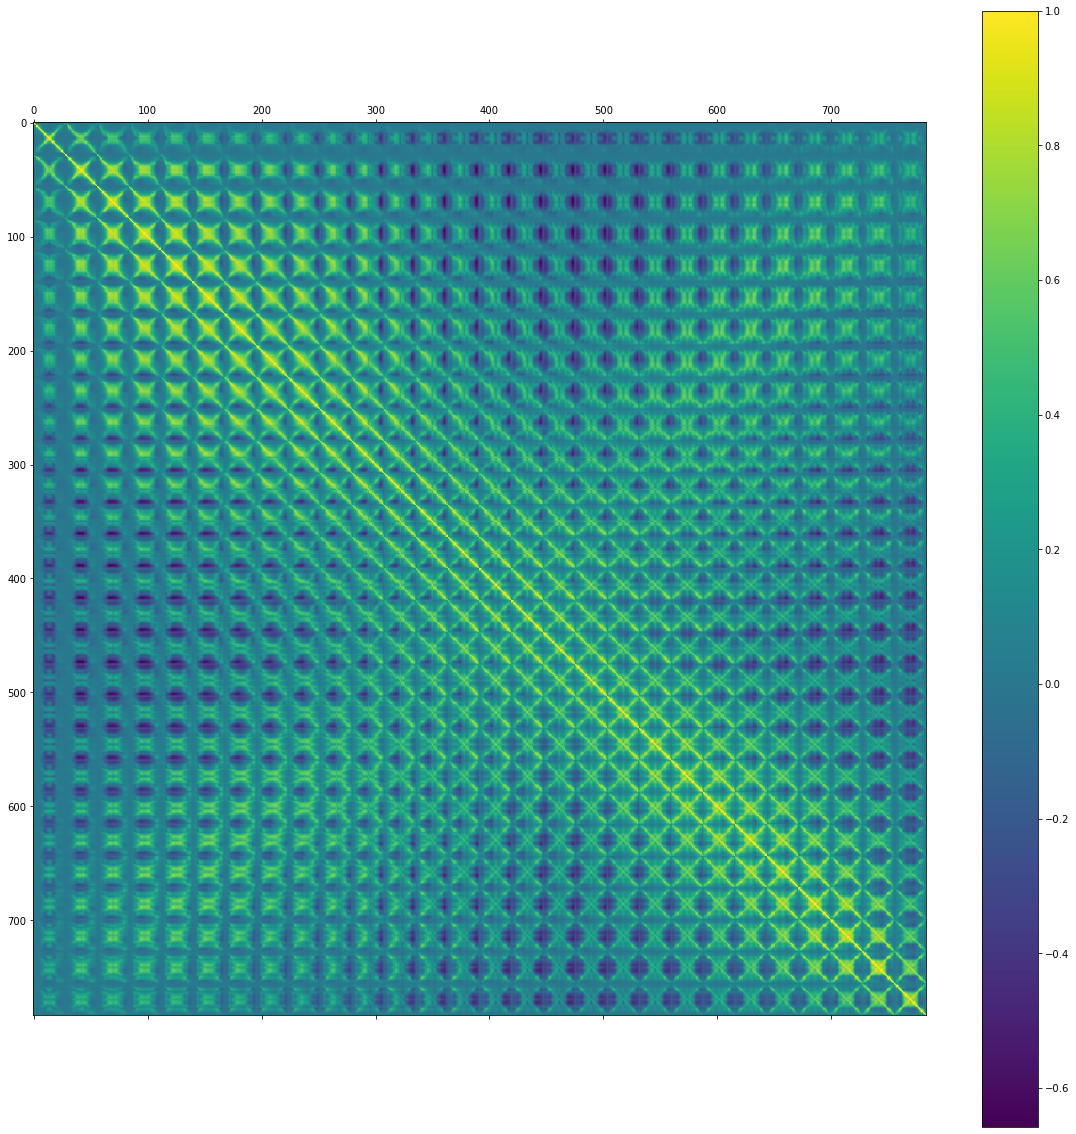

In [12]:
plt.figure(figsize=(20, 20))
plt.matshow(corr, fignum = 1)
plt.colorbar()

## PCA

In [9]:
label_to_plot = []
for label in y_train_fashion:
    if label == 0:
        label_to_plot.append("T-shirt")
    elif label == 1:
        label_to_plot.append("Trouser")
    elif label == 2:
        label_to_plot.append("Pullover")
    elif label == 3:
        label_to_plot.append("Dress")
    elif label == 4:
        label_to_plot.append("Coat")
    elif label == 5:
        label_to_plot.append("Sandal")
    elif label == 6:
        label_to_plot.append("Shirt")
    elif label == 7:
        label_to_plot.append("Sneaker")
    elif label == 8:
        label_to_plot.append("Bag")
    else:
        label_to_plot.append("Ankle boot")

In [14]:
pca = PCA()
pca.n_components = df.shape[1]
pca_data = pca.fit_transform(df)

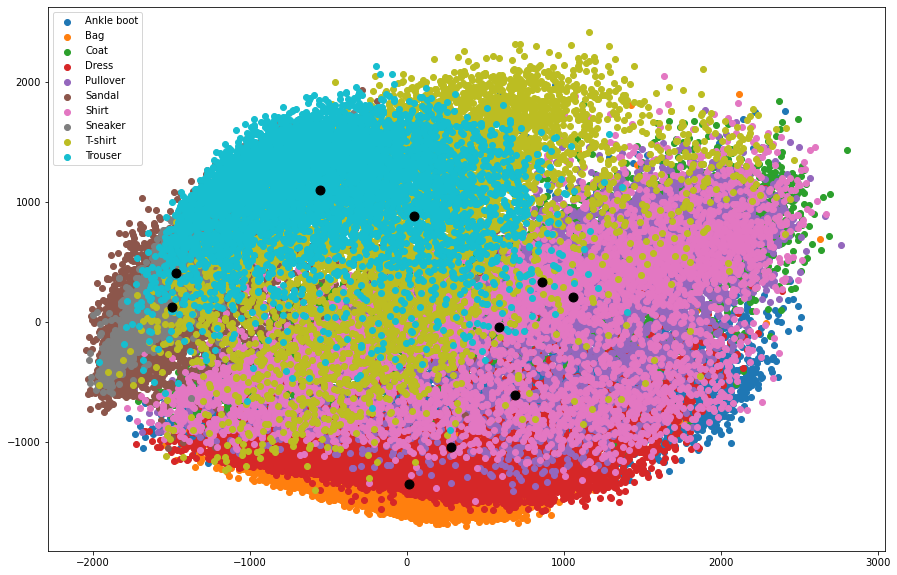

In [15]:
x = pca_data[:,0]
y = pca_data[:,1]

label = y_train_fashion
u_labels = np.unique(y_train_fashion)

plt.figure(figsize=(15, 10))

centroids_0 = []
centroids_1 = []

for i in u_labels:
    x_current = x[label == i]
    y_current = y[label == i]
    
    centroids_0.append(x_current.mean())
    centroids_1.append(y_current.mean())
    
    plt.scatter(x_current, y_current, label = np.unique(label_to_plot)[i])
plt.scatter(centroids_0 , centroids_1 , s = 80, color = 'k')

plt.legend()
plt.show()

percebemos que existem segmentos, mas eles se sobresaem em duas dimensões: Não conseguimos explicar muito bem o comportamento do dado apenas com essas informações.

In [16]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

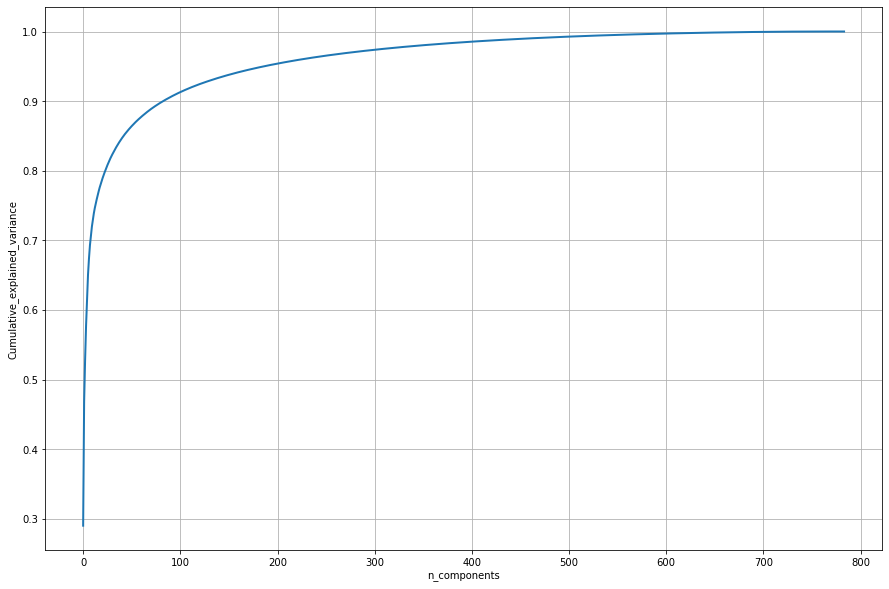

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

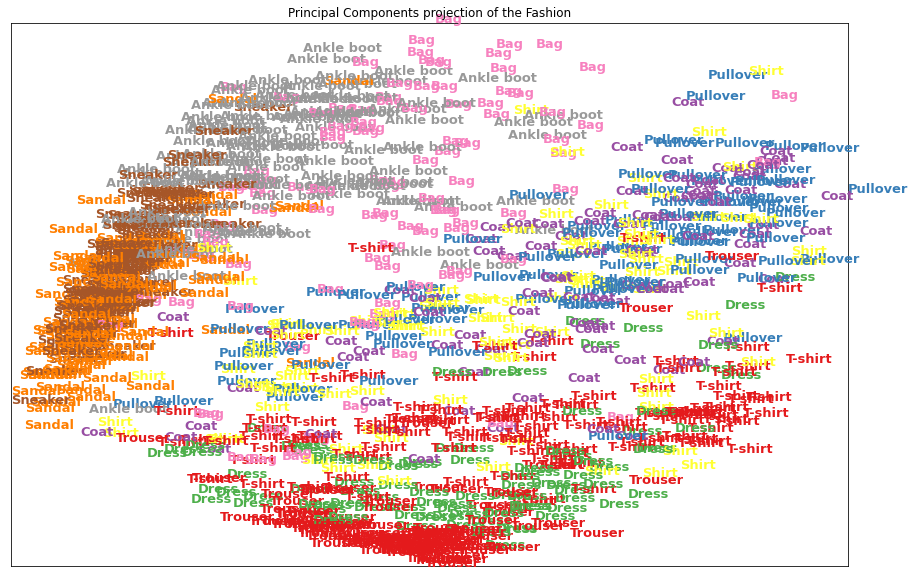

In [18]:
y = y_train_fashion[0:1000]
plot_2d_embedding(pca_data[0:1000], y = y, labels = label_to_plot[0:1000], size = 13, title = "Principal Components projection of the Fashion")

## LDA 

In [11]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(df, y_train_fashion)
lda_data = lda.transform(df)

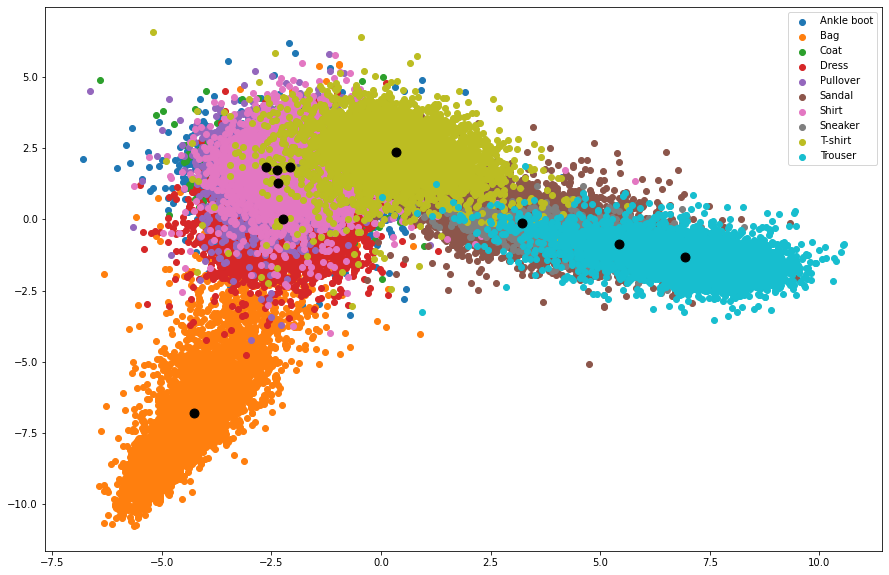

In [12]:
x = lda_data[:,0]
y = lda_data[:,1]

label = y_train_fashion
u_labels = np.unique(y_train_fashion)

plt.figure(figsize=(15, 10))

centroids_0 = []
centroids_1 = []

for i in u_labels:
    x_current = x[label == i]
    y_current = y[label == i]
    
    centroids_0.append(x_current.mean())
    centroids_1.append(y_current.mean())
    
    plt.scatter(x_current, y_current, label = np.unique(label_to_plot)[i])
plt.scatter(centroids_0 , centroids_1 , s = 80, color = 'k')
plt.legend()
plt.show()

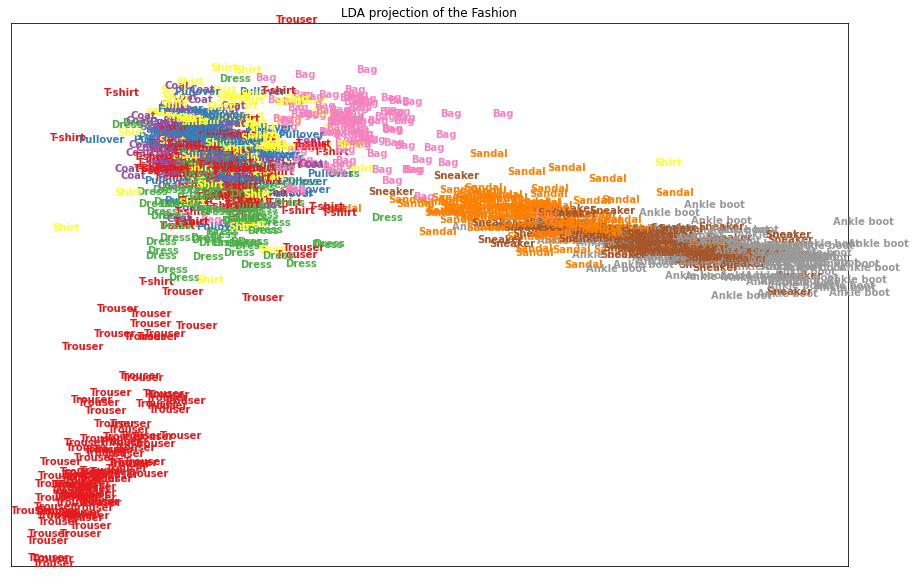

In [21]:
y = y_train_fashion[0:1000]
plot_2d_embedding(lda_data[0:1000], y = y, labels = label_to_plot, size = 10, title = "LDA projection of the Fashion")

## T-SNE

In [22]:
X_embedded = TSNE(n_components=2).fit_transform(df[0:500])

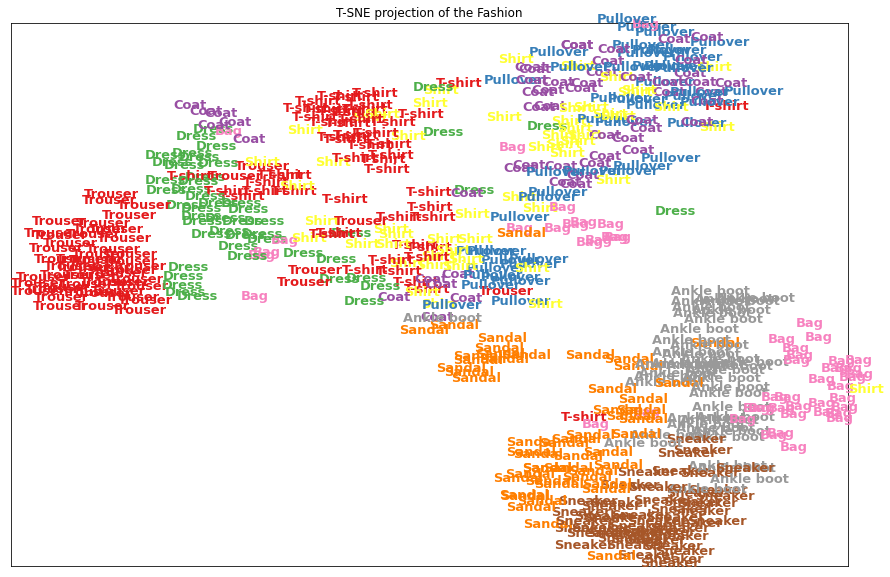

In [23]:
y = y_train_fashion[0:500]
plot_2d_embedding(X_embedded, y, label_to_plot, size = 13, title =  "T-SNE projection of the Fashion")

# Modelagem 

In [26]:
# Search para melhor numero de componentes e de penalizacao para regressao logisticia

pca = PCA()

# tol = tolerancia para não demorar muito rodando (atencao para convergencia)
# multi_class = "multinomial" por ser um dataset com mais de 2 labels.
# Note que por default, a classe já identifica e trata isso, mas preferi explicitar.
# Nesse caso, o modelo utiliza a distribuição multinomial ao invés da bernoulli na modelagem

logistic = LogisticRegression(max_iter=10000, tol=0.1, multi_class="multinomial")

pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# parametros de diferentes steps da pipeline podem ser definidos com '__'
param_grid = {
    'pca__n_components': [2, 5, 50, 100],
    'logistic__C': np.logspace(-4, 4, 2),
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(reshaped_train[0:5000], y_train_fashion[0:5000])
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.829):
{'logistic__C': 0.0001, 'pca__n_components': 100}


In [27]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
0.0001_100,"{'logistic__C': 0.0001, 'pca__n_components': 100}",1,0.8286,0.014555
0.0001_50,"{'logistic__C': 0.0001, 'pca__n_components': 50}",2,0.8268,0.017497
10000.0_50,"{'logistic__C': 10000.0, 'pca__n_components': 50}",3,0.8230,0.017731
10000.0_100,"{'logistic__C': 10000.0, 'pca__n_components': ...",4,0.7996,0.020264
10000.0_5,"{'logistic__C': 10000.0, 'pca__n_components': 5}",5,0.7020,0.011171
0.0001_5,"{'logistic__C': 0.0001, 'pca__n_components': 5}",6,0.7016,0.010594
10000.0_2,"{'logistic__C': 10000.0, 'pca__n_components': 2}",7,0.5056,0.013094
0.0001_2,"{'logistic__C': 0.0001, 'pca__n_components': 2}",8,0.5018,0.012156


In [29]:
y_pred = search.predict(reshaped_test)
target_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(classification_report(y_test_fashion, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     T-shirt       0.79      0.76      0.78      1000
     Trouser       0.96      0.95      0.95      1000
    Pullover       0.70      0.69      0.69      1000
       Dress       0.82      0.85      0.83      1000
        Coat       0.70      0.71      0.71      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.54      0.54      0.54      1000
     Sneaker       0.89      0.91      0.90      1000
         Bag       0.92      0.91      0.91      1000
  Ankle boot       0.91      0.93      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [30]:
pca = PCA(n_components=100).fit(reshaped_train)
embedded_data_train = pca.transform(reshaped_train)
embedded_data_test = pca.transform(reshaped_test)

### Comparando diferentes modelos: Logistica, QDA e random forest.

Vamos treinar apenas com 5 mil observações para estimar a performance e depois vamos reajustar o modelo com todos os dados

In [33]:
logistic = LogisticRegression(max_iter=10000, tol=0.1, multi_class="multinomial")
logistic.fit(embedded_data_train[0:5000], y_train_fashion[0:5000])

y_pred = logistic.predict(embedded_data_test)

print(classification_report(y_test_fashion, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     T-shirt       0.80      0.76      0.78      1000
     Trouser       0.91      0.95      0.93      1000
    Pullover       0.70      0.67      0.68      1000
       Dress       0.82      0.82      0.82      1000
        Coat       0.69      0.70      0.70      1000
      Sandal       0.87      0.87      0.87      1000
       Shirt       0.56      0.54      0.55      1000
     Sneaker       0.86      0.91      0.88      1000
         Bag       0.90      0.87      0.89      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



/Users/dimassoares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
cv = KFold(n_splits=10, random_state=1, shuffle = True)

In [38]:
qda = QuadraticDiscriminantAnalysis()

param_grid = {'priors': [np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]), 
                         np.array([0.73, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]), 
                         np.array([0.03, 0.73, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]), 
                         np.array([0.03, 0.03, 0.73, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]), 
                         np.array([0.03, 0.03, 0.03, 0.73, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]), 
                         np.array([0.03, 0.03, 0.03, 0.03, 0.73, 0.03, 0.03, 0.03, 0.03, 0.03]), 
                         np.array([0.03, 0.03, 0.03, 0.03, 0.03, 0.73, 0.03, 0.03, 0.03, 0.03]), 
                         np.array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.73, 0.03, 0.03, 0.03]), 
                         np.array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.73, 0.03, 0.03]), 
                         np.array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.73, 0.03]), 
                         np.array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.73])]}

search = GridSearchCV(qda, 
                      param_grid,
                      scoring='accuracy',
                      n_jobs=-1, 
                      cv = cv, 
                      verbose = 3)

search_qda = search.fit(embedded_data_train[0:5000], y_train_fashion[0:5000])
print("Best parameter (CV score=%0.3f):" % search_qda.best_score_)
print(search_qda.best_params_)

y_pred = search_qda.predict(embedded_data_test)

print(classification_report(y_test_fashion, y_pred, target_names=target_names))

Fitting 10 folds for each of 11 candidates, totalling 110 fits
Best parameter (CV score=0.813):
{'priors': array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.73, 0.03, 0.03, 0.03])}
              precision    recall  f1-score   support

     T-shirt       0.79      0.74      0.76      1000
     Trouser       0.97      0.91      0.94      1000
    Pullover       0.78      0.69      0.73      1000
       Dress       0.75      0.85      0.80      1000
        Coat       0.67      0.75      0.71      1000
      Sandal       0.92      0.81      0.86      1000
       Shirt       0.51      0.48      0.49      1000
     Sneaker       0.80      0.93      0.86      1000
         Bag       0.91      0.95      0.93      1000
  Ankle boot       0.96      0.92      0.93      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



In [39]:
rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

search = GridSearchCV(rfc, param_grid, n_jobs=-1, cv = cv, verbose = 3)
search_rfc = search.fit(embedded_data_train[0:5000], y_train_fashion[0:5000])
print("Best parameter (CV score=%0.3f):" % search_rfc.best_score_)
print(search_rfc.best_params_)

y_pred = search_rfc.predict(embedded_data_test)

print(classification_report(y_test_fashion, y_pred, target_names=target_names))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameter (CV score=0.824):
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
              precision    recall  f1-score   support

     T-shirt       0.72      0.82      0.76      1000
     Trouser       0.99      0.94      0.96      1000
    Pullover       0.68      0.73      0.70      1000
       Dress       0.81      0.86      0.83      1000
        Coat       0.67      0.72      0.69      1000
      Sandal       0.86      0.85      0.86      1000
       Shirt       0.62      0.39      0.48      1000
     Sneaker       0.88      0.85      0.86      1000
         Bag       0.89      0.91      0.90      1000
  Ankle boot       0.86      0.95      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

